<p style="text-align: center;">
    <span style="font-size: xx-large; font-weight: bold; color: red;">
        PROJET 8 :
        Réalisez un dashboard et assurez une veille technique 
    </span>
</p>  

__Sommaire__

**Partie 1 : Importation des bibliothèques**

**Partie 2 : Pre-processing et feature engineering**

**Partie 3 : Approche méthode classique Tf-IDF**
- <a>Matrice de confusion</a>
- <a>Analyse locale et globale</a>

**Partie 4 : Approche avancée  Word2vec**
- <a>Matrice de confusion</a>
- <a>Analyse locale et globale</a>

**Partie 5 : Approche avancée  Bert**
- <a>Matrice de confusion</a>
- <a>Analyse locale et globale</a>

**Partie 6 : Approche méthode innovante DeBERTa**
- <a>Matrice de confusion</a>
- <a>Analyse locale et globale</a>

**Partie 7 : Comparaison des méthodes**

# <a name="C2"><span style="text-decoration: underline;">Partie 1 : Importation des bibliotheques</span></a>

In [137]:
# Import des bibliothèques générales
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from random import choice

# Import de PyTorch et Transformers
import torch
from torch.utils.data import DataLoader, TensorDataset, Dataset, random_split
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, BertTokenizer, BertModel

# Bibliothèques de NLP et traitement de texte
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Bibliothèques pour la modélisation et l'optimisation
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Bibliothèques de réduction de dimension et clustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Bibliothèques pour les métriques
from sklearn.metrics import (
    adjusted_rand_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
from scipy.optimize import linear_sum_assignment

# Bibliothèque pour le traitement des vecteurs Word2Vec
from gensim.models import Word2Vec

# <a name="C2"><span style="text-decoration: underline;">Partie 2 : Pre-processing et feature engineering</span></a>

In [139]:
ecom = pd.read_csv("/Users/Nelly/Desktop/projet_8/Veille technique/flipkart_com-ecommerce_sample_1050.csv")

In [140]:
ecom.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


<span style="text-decoration: underline;">Selection des features</span>

In [142]:
# Liste des colonnes a garder
columns_to_keep = [ 'description','image','brand','uniq_id', 'product_name','product_category_tree' ]

ecom= ecom[columns_to_keep]

In [143]:
ecom.head()

,description,image,brand,uniq_id,product_name,product_category_tree
0,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>..."
1,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,Key Features of Jaipur Print Cotton Floral Kin...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


<span style="text-decoration: underline;">Fonctions</span>

In [145]:
# Fonction pour nettoyer et séparer les catégories
def get_first_category(text):
    # Enlever les crochets et les guillemets autour du texte
    text = text.strip("[]").replace("'", "").replace('"', "").strip()
    # Séparer les niveaux de catégorie et prendre le premier
    first_category = text.split(" >> ")[0]
    return first_category

In [146]:
stop_words = set(stopwords.words('english'))
# Fonction de nettoyage
def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Supprimer les mots de liaison
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]  # Exclut les mots courts
    return ' '.join(words)

In [147]:
def compute_tfidf_matrix(sentences):
    # Initialiser le TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Transformer les phrases en matrice de poids Tf-idf
    X_tfidf = tfidf_vectorizer.fit_transform(sentences)

    # Créer un DataFrame pour afficher les mots et leurs poids Tf-idf
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_matrix_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)

    return tfidf_matrix_df

<span style="text-decoration: underline;">Traitement des données manquantes</span>

In [149]:
#Afficher le total des valeurs manquantes par colonne
missing_values = ecom.isnull().sum()
print("Nombre de valeurs manquantes par colonne :\n", missing_values)

Nombre de valeurs manquantes par colonne :
 description                0
image                      0
brand                    338
uniq_id                    0
product_name               0
product_category_tree      0
dtype: int64


<span style="text-decoration: underline;">Traitement du dataframe</spam>

In [151]:
#nettoyage de la colonne description
ecom['cleaned_description'] = ecom['description'].apply(clean_text)

In [152]:
# Appliquer la fonction categorie
ecom['main_category'] = ecom['product_category_tree'].apply(get_first_category)

In [153]:
ecom = ecom.drop(columns=['product_category_tree','description'])

In [154]:
ecom.head()

,image,brand,uniq_id,product_name,cleaned_description,main_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,key features elegance polyester multicolor abs...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,specifications sathiyas cotton bath towel bath...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,key features eurospa cotton terry face towel s...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,key features santosh royal fashion cotton prin...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,key features jaipur print cotton floral king s...,Home Furnishing


In [155]:
# Définir les valeurs de min_df et max_df
min_freq = 0.01  # Les mots doivent apparaître dans au moins 1% des documents
max_freq = 0.95  # Les mots ne doivent pas apparaître dans plus de 95% des documents

# Tf-idf avec normalisation
tfidf_vectorizer = TfidfVectorizer(min_df=min_freq, max_df=max_freq, max_features=1000, norm='l2')
X_tfidf = tfidf_vectorizer.fit_transform(ecom['cleaned_description'])

# Créer un DataFrame pour afficher les poids Tf-idf moyens de chaque mot
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_weights = X_tfidf.mean(axis=0).A1  # Moyenne des poids Tf-idf pour chaque mot
tfidf_df = pd.DataFrame({'Word': tfidf_feature_names, 'Average_Tf-idf': tfidf_weights})

# Trier les mots par poids moyen décroissant
tfidf_df = tfidf_df.sort_values(by='Average_Tf-idf', ascending=False)
print("Top 10 des mots avec les poids moyens Tf-idf les plus utilisé:\n", tfidf_df.head(10))

Top 10 des mots avec les poids moyens Tf-idf les plus utilisé:
             Word  Average_Tf-idf
167  flipkartcom        0.086250
389     shipping        0.075170
61          cash        0.075170
179      genuine        0.075170
346     products        0.075101
117     delivery        0.075054
170         free        0.074444
55           buy        0.074149
361  replacement        0.067423
113          day        0.067190


In [156]:
# Transformer la colonne de texte en matrice de comptage de mots
X_tfidf = tfidf_vectorizer.fit_transform(ecom['cleaned_description'])

# Créer un DataFrame avec les mots en en-tête de colonnes
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_matrix_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)

# Afficher les premières lignes de la matrice Tf-idf
tfidf_matrix_df.head()

,abstract,accessories,actual,adapter,adapters,add,additional,adorable,affordable,age,...,wood,wooden,work,would,year,years,yellow,yes,yet,youre
0,0.228736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.195638,0.075417,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.057961,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.052241,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.040979,0.0,0.0


# <a name="C3"><span style="text-decoration: underline;">Partie 3 : Approches méthode classique Tf-IDF</span></a>

Réduction de dimension avec PCA...
Réduction de dimension avec T-SNE...
Application de K-Means sur les données T-SNE...
Adjusted Rand Index (ARI) avant optimisation : 0.138


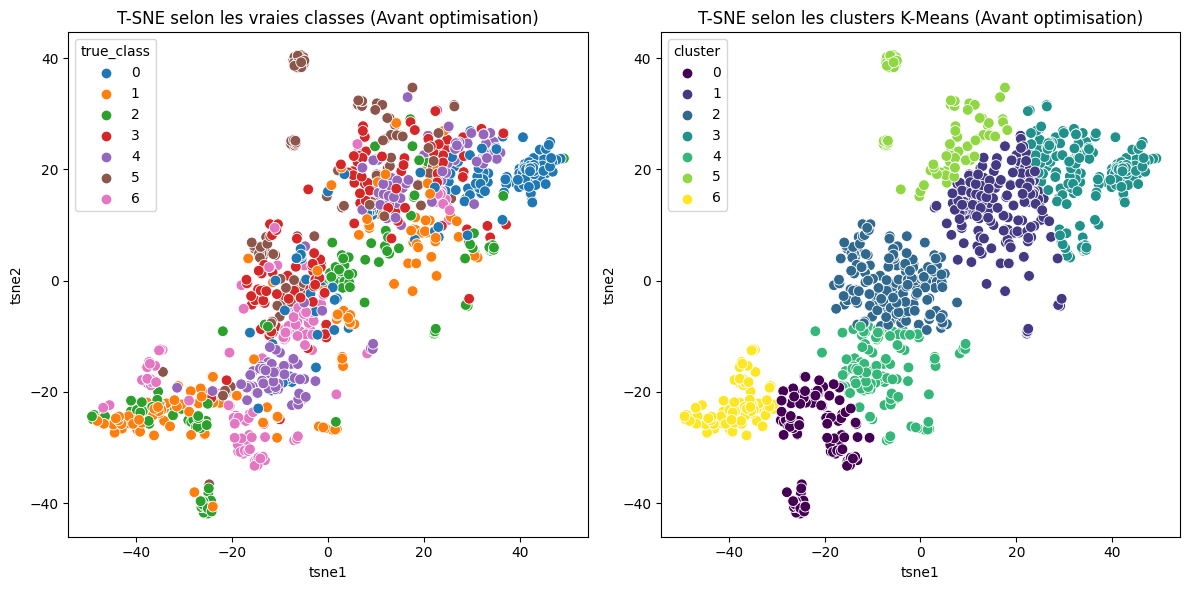

In [158]:
# Encodage des catégories
le = LabelEncoder()
ecom['category_encoded'] = le.fit_transform(ecom['main_category'])

# Définir les features et la cible
X_text = ecom['cleaned_description']
y = ecom['category_encoded']

# Pipeline avec TF-IDF et sans classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF avec paramètres par défaut
])

# Transformation du texte en embeddings TF-IDF
X_tfidf = pipeline.fit_transform(X_text).toarray()

# Normalisation des données après transformation TF-IDF
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_tfidf)

# Réduction de dimension avec PCA
print("Réduction de dimension avec PCA...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Réduction de dimension avec T-SNE
print("Réduction de dimension avec T-SNE...")
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_pca)

# K-Means pour le clustering
print("Application de K-Means sur les données T-SNE...")
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Calcul de l'ARI
ari_score_default = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI) avant optimisation : {ari_score_default:.3f}")

# Visualisation des résultats T-SNE avant optimisation
df_tsne_default = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne_default['true_class'] = y
df_tsne_default['cluster'] = clusters

plt.figure(figsize=(12, 6))

# Vraies classes
plt.subplot(1, 2, 1)
sns.scatterplot(x='tsne1', y='tsne2', hue='true_class', palette="tab10", data=df_tsne_default, s=60)
plt.title("T-SNE selon les vraies classes (Avant optimisation)")

# Clusters K-Means
plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', palette="viridis", data=df_tsne_default, s=60)
plt.title("T-SNE selon les clusters K-Means (Avant optimisation)")

plt.tight_layout()
plt.show()

Démarrage de la recherche des meilleurs hyperparamètres TF-IDF...
Meilleurs paramètres pour TF-IDF :
{'tfidf__max_df': 0.7, 'tfidf__max_features': 1000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
Réduction de dimension avec PCA...
Réduction de dimension avec T-SNE...
Application de K-Means sur les données T-SNE...
Adjusted Rand Index (ARI) après T-SNE et K-Means : 0.348


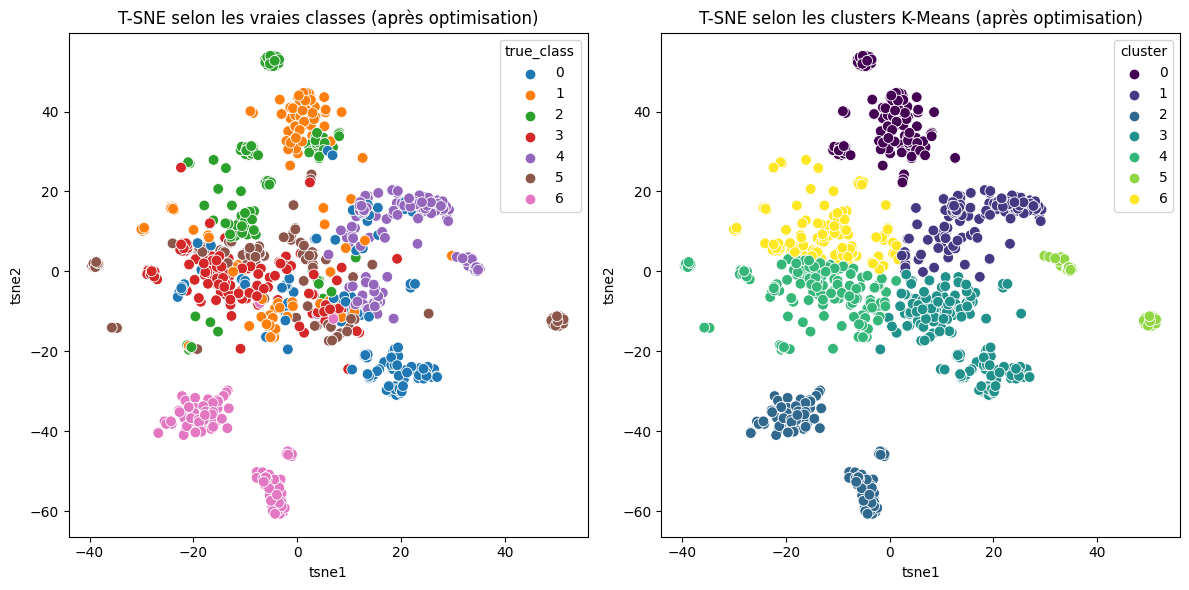

In [159]:
# Fonction pour calculer le ARI dans le contexte de GridSearchCV
def ari_score(estimator, X, y):
    """Calcul de l'ARI pour GridSearchCV"""
    # Transformation des données d'entrée en TF-IDF
    X_tfidf = estimator.transform(X).toarray()
    
    # Normalisation des données TF-IDF
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X_tfidf)
    
    # Réduction de dimension avec PCA
    pca = PCA(n_components=50, random_state=42)
    X_pca = pca.fit_transform(X_normalized)
    
    # Réduction de dimension avec T-SNE
    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
    X_tsne = tsne.fit_transform(X_pca)
    
    # Clustering K-Means
    kmeans = KMeans(n_clusters=7, random_state=42)
    clusters = kmeans.fit_predict(X_tsne)
    
    # Calcul du ARI
    return adjusted_rand_score(y, clusters)

# Définition des variables
X_text = ecom['cleaned_description']
y = ecom['category_encoded']

# Pipeline avec TF-IDF uniquement
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())  # TF-IDF avec paramètres par défaut
])

# Paramètres pour GridSearchCV
param_grid = {
    'tfidf__max_df': [0.7, 0.8, 0.9],  # Maximum fréquence des termes
    'tfidf__min_df': [2, 3],  # Minimum fréquence des termes
    'tfidf__max_features': [1000, 2000],  # Nombre de features max
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams et bigrams
}

# GridSearchCV pour optimiser les hyperparamètres du TF-IDF en fonction de l'ARI
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring=ari_score, verbose=0)
print("Démarrage de la recherche des meilleurs hyperparamètres TF-IDF...")
grid_search.fit(X_text, y)

print("Meilleurs paramètres pour TF-IDF :")
print(grid_search.best_params_)

# Extraction des embeddings TF-IDF optimisés
tfidf_vectorizer = grid_search.best_estimator_.named_steps['tfidf']
X_tfidf = tfidf_vectorizer.transform(X_text).toarray()

# Normalisation des données après transformation TF-IDF
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_tfidf)

# Réduction de dimension avec PCA
print("Réduction de dimension avec PCA...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Réduction de dimension avec T-SNE
print("Réduction de dimension avec T-SNE...")
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_pca)

# K-Means pour le clustering
print("Application de K-Means sur les données T-SNE...")
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Calcul de l'ARI
ari_score_final = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI) après T-SNE et K-Means : {ari_score_final:.3f}")

# Visualisation des résultats T-SNE
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['true_class'] = y
df_tsne['cluster'] = clusters

plt.figure(figsize=(12, 6))

# Vraies classes
plt.subplot(1, 2, 1)
sns.scatterplot(x='tsne1', y='tsne2', hue='true_class', palette="tab10", data=df_tsne, s=60)
plt.title("T-SNE selon les vraies classes (après optimisation)")

# Clusters K-Means
plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', palette="viridis", data=df_tsne, s=60)
plt.title("T-SNE selon les clusters K-Means (après optimisation)")

plt.tight_layout()
plt.show()

Matrice de confusion :
[[ 93   2   3  27  25   0   0]
 [  6  85  17  31  10   1   0]
 [  6  67  63  11   3   0   0]
 [ 28   1  32  85   4   0   0]
 [ 37   0   0   0  94  19   0]
 [ 28   3  61  28   9  21   0]
 [  1   0   0   1   1   0 147]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.47      0.62      0.53       150
           1       0.54      0.57      0.55       150
           2       0.36      0.42      0.39       150
           3       0.46      0.57      0.51       150
           4       0.64      0.63      0.64       150
           5       0.51      0.14      0.22       150
           6       1.00      0.98      0.99       150

    accuracy                           0.56      1050
   macro avg       0.57      0.56      0.55      1050
weighted avg       0.57      0.56      0.55      1050



<Axes: >

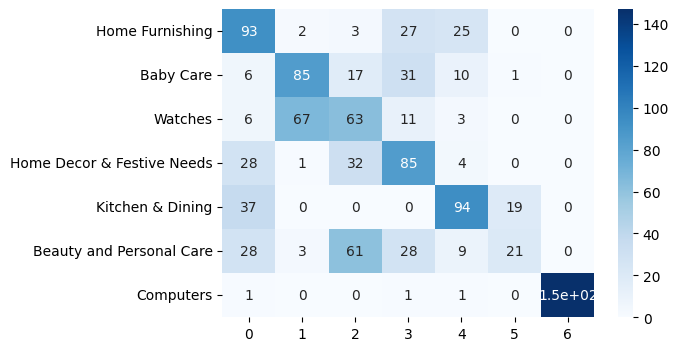

In [160]:
# Définir la fonction conf_mat_transform
def conf_mat_transform(true_labels, predicted_labels):
    """
    Aligne les clusters sur les vraies classes en utilisant la matrice de confusion
    et l'algorithme d'affectation hongroise.
    """
    # Calculer la matrice de confusion brute
    conf_matrix_raw = confusion_matrix(true_labels, predicted_labels)
    
    # Appliquer l'algorithme hongrois pour maximiser les correspondances
    row_ind, col_ind = linear_sum_assignment(-conf_matrix_raw)
    
    # Créer un mappage entre les clusters prédits et les classes réelles
    cluster_mapping = {col: row for col, row in zip(col_ind, row_ind)}
    
    # Transformer les étiquettes prédites en utilisant le mappage
    transformed_labels = [cluster_mapping[label] for label in predicted_labels]
    return transformed_labels
    
# Appliquer la transformation aux clusters prédits pour les données TF-IDF
clusters_transformed = conf_mat_transform(y, clusters)

# Calcul de la matrice de confusion et du rapport de classification avec les clusters transformés
conf_mat = confusion_matrix(y, clusters_transformed)
print("Matrice de confusion :")
print(conf_mat)

print("\nRapport de classification :")
print(classification_report(y, clusters_transformed))

# Affichage de la matrice de confusion sous forme de heatmap
list_labels = ["Home Furnishing", "Baby Care", "Watches", "Home Decor & Festive Needs", "Kitchen & Dining", "Beauty and Personal Care", "Computers"]

df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

<span style="text-decoration: underline;">Analyse globale TF-IDF</span>

In [162]:
# Analyse globale des poids des tokens dans le TF-IDF
print("Analyse globale des tokens avec TF-IDF...")
tfidf_weights = np.mean(X_tfidf, axis=0)  # Moyenne des poids TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Créer un DataFrame pour les poids
global_feature_importance = pd.DataFrame({
    'Token': feature_names,
    'Weight': tfidf_weights
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 mots les plus importants
print(global_feature_importance.head(10))

Analyse globale des tokens avec TF-IDF...
           Token    Weight
344  flipkartcom  0.079622
805     shipping  0.066187
127         cash  0.066187
371      genuine  0.066187
240     delivery  0.066084
715     products  0.065873
355         free  0.065338
114          buy  0.065127
753  replacement  0.058526
227          day  0.058395


<span style="text-decoration: underline;">Analyse locale TF-IDF</span>

In [164]:
# Analyse locale des tokens pour un produit spécifique
index = 1  # Index du produit spécifique
print(f"Analyse locale pour le produit à l'index {index}...")

# Extraire les poids TF-IDF pour ce produit
local_weights = X_tfidf[index]
local_feature_importance = pd.DataFrame({
    'Token': feature_names,
    'Weight': local_weights
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 mots les plus importants localement
print(local_feature_importance.head(10))

Analyse locale pour le produit à l'index 1...
      Token    Weight
919   towel  0.586914
66     bath  0.564332
996  yellow  0.195638
196  cotton  0.191836
742     red  0.185446
85     blue  0.160187
444    inch  0.155558
244  design  0.127255
577   model  0.121940
398     gsm  0.112970


# <a name="C3"><span style="text-decoration: underline;">Partie 4 : Approches méthode Word2vec</span></a>

In [166]:
# Conversion de 'cleaned_description' en chaîne de caractères
ecom['cleaned_description'] = ecom['cleaned_description'].fillna("").astype(str)
descriptions = ecom['cleaned_description'].tolist()

# 2. Word2Vec
# Préparer les données pour Word2Vec
tokenized_descriptions = [desc.split() for desc in descriptions]

# Entraînement du modèle Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)

# Calcule des vecteurs Word2Vec pour chaque description
word2vec_vectors = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
                            or [np.zeros(100)], axis=0) for words in tokenized_descriptions]

# Convertir les vecteurs Word2Vec en DataFrame
df_word2vec = pd.DataFrame(word2vec_vectors)
print("\nMatrice de vecteurs Word2Vec :")
print(df_word2vec.head())

# 3. BERT
# Charger le modèle BERT et le tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_vectors = []

# Calculer les vecteurs BERT pour chaque description
for desc in descriptions:
    inputs = tokenizer(desc, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = bert_model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    bert_vectors.append(embeddings[0])

# Convertir les vecteurs BERT en DataFrame
df_bert = pd.DataFrame(bert_vectors)
print("\nMatrice de vecteurs BERT :")
print(df_bert.head())


Matrice de vecteurs Word2Vec :
         0         1         2         3         4         5         6   \
0  0.028864  0.197802  0.092168  0.004248  0.174454 -0.434533  0.057026   
1  0.153536  0.273577  0.081022 -0.049323  0.285553 -0.674443  0.065307   
2  0.023810  0.259244  0.118428  0.011427  0.208248 -0.575211  0.084861   
3  0.114605  0.243929  0.097762 -0.044215  0.263345 -0.602389  0.053543   
4  0.077031  0.256437  0.112094 -0.026295  0.251444 -0.604123  0.058663   

         7         8         9   ...        90        91        92        93  \
0  0.693490 -0.134739  0.069762  ...  0.187693  0.065660 -0.113123  0.053850   
1  1.029482 -0.201397  0.159510  ...  0.281639  0.058127 -0.138886  0.114077   
2  0.896085 -0.187830  0.045325  ...  0.255385  0.101675 -0.131602  0.088460   
3  0.927482 -0.162990  0.170452  ...  0.247249  0.013591 -0.134878  0.058178   
4  0.939226 -0.168774  0.136231  ...  0.247704  0.050289 -0.146342  0.065953   

         94        95        96     

In [167]:
def pipeline_common(vector_df, method_name):
    """
    Pipeline commun pour appliquer T-SNE et K-Means, calculer l'ARI.
    vector_df : DataFrame contenant les vecteurs extraits (Word2Vec, BERT).
    method_name : Nom de la méthode pour affichage des résultats.
    """
    # Normalisation des données
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(vector_df)

    # Réduction de dimension avec PCA
    pca = PCA(n_components=50, random_state=42)
    features_pca = pca.fit_transform(features_scaled)

    # Réduction de dimension avec T-SNE
    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
    X_tsne = tsne.fit_transform(features_pca)

    # Création du DataFrame T-SNE
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne['class'] = ecom['category_encoded']

    # Visualisation de T-SNE selon les vraies classes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='tsne1', y='tsne2', hue='class', palette="tab10", s=50, alpha=0.6, data=df_tsne)
    plt.title(f"T-SNE selon les vraies classes - {method_name}", fontsize=20, fontweight='bold')
    plt.xlabel("tsne1", fontsize=16, fontweight='bold')
    plt.ylabel("tsne2", fontsize=16, fontweight='bold')
    plt.legend(title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
    plt.show()

    # Clustering K-Means
    kmeans_tsne = KMeans(n_clusters=7, random_state=42)
    clusters_tsne = kmeans_tsne.fit_predict(X_tsne)
    df_tsne['cluster'] = clusters_tsne

    # Visualisation de T-SNE selon les clusters K-Means
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', palette="viridis", s=50, alpha=0.6, data=df_tsne)
    plt.title(f"T-SNE selon les clusters K-Means - {method_name}", fontsize=20, fontweight='bold')
    plt.xlabel("tsne1", fontsize=16, fontweight='bold')
    plt.ylabel("tsne2", fontsize=16, fontweight='bold')
    plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
    plt.show()

    # Calcul de l'ARI
    ari_score = adjusted_rand_score(ecom['category_encoded'], clusters_tsne)
    print(f"Adjusted Rand Index (ARI) après T-SNE - {method_name} : {ari_score}\n")

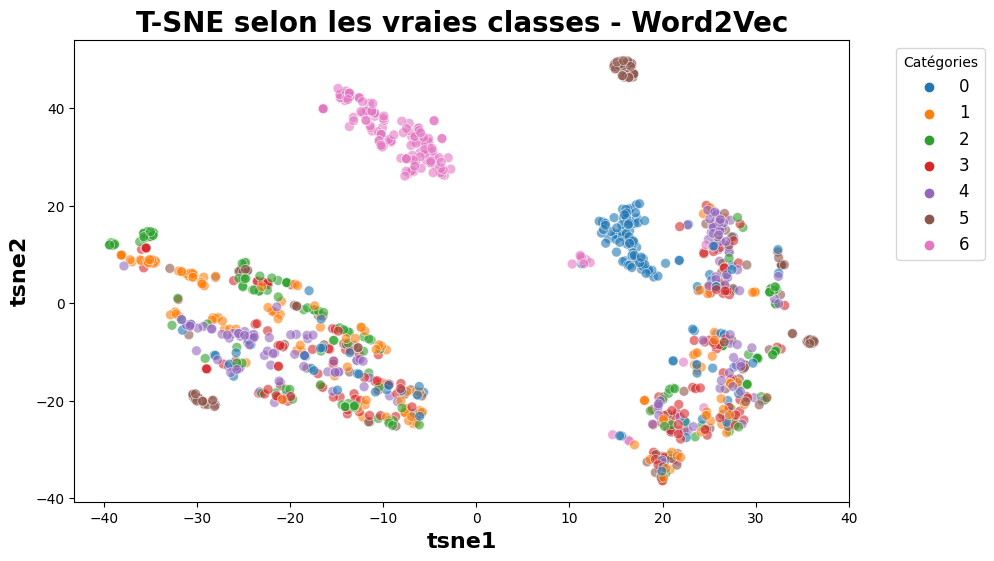

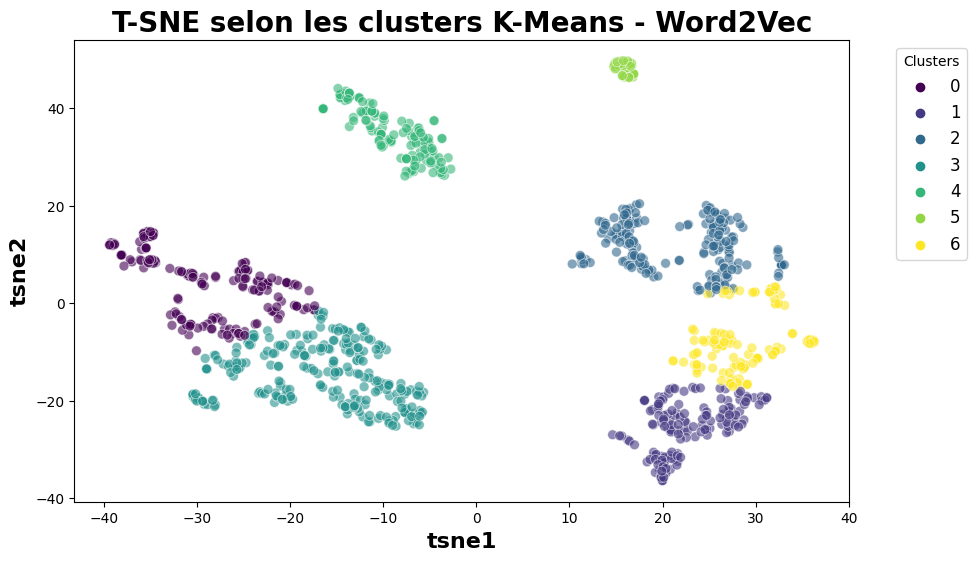

Adjusted Rand Index (ARI) après T-SNE - Word2Vec : 0.19322780803800593



In [168]:
# Appliquer la pipeline pour Word2Vec
pipeline_common(df_word2vec, "Word2Vec")

Params: vector_size=50, window=3, epochs=5, tsne_lr=10 -> ARI=0.2612034372262661
Params: vector_size=50, window=3, epochs=5, tsne_lr=50 -> ARI=0.2575770540206998
Params: vector_size=50, window=3, epochs=5, tsne_lr=200 -> ARI=0.2522426135896167
Params: vector_size=50, window=3, epochs=10, tsne_lr=10 -> ARI=0.2860216298106339
Params: vector_size=50, window=3, epochs=10, tsne_lr=50 -> ARI=0.25387625611770653
Params: vector_size=50, window=3, epochs=10, tsne_lr=200 -> ARI=0.2671221909580642
Params: vector_size=50, window=3, epochs=20, tsne_lr=10 -> ARI=0.28716461033449686
Params: vector_size=50, window=3, epochs=20, tsne_lr=50 -> ARI=0.27276942358927736
Params: vector_size=50, window=3, epochs=20, tsne_lr=200 -> ARI=0.30260802505402296
Params: vector_size=50, window=5, epochs=5, tsne_lr=10 -> ARI=0.2535937103873326
Params: vector_size=50, window=5, epochs=5, tsne_lr=50 -> ARI=0.27016968221985566
Params: vector_size=50, window=5, epochs=5, tsne_lr=200 -> ARI=0.2406960108874842
Params: vecto

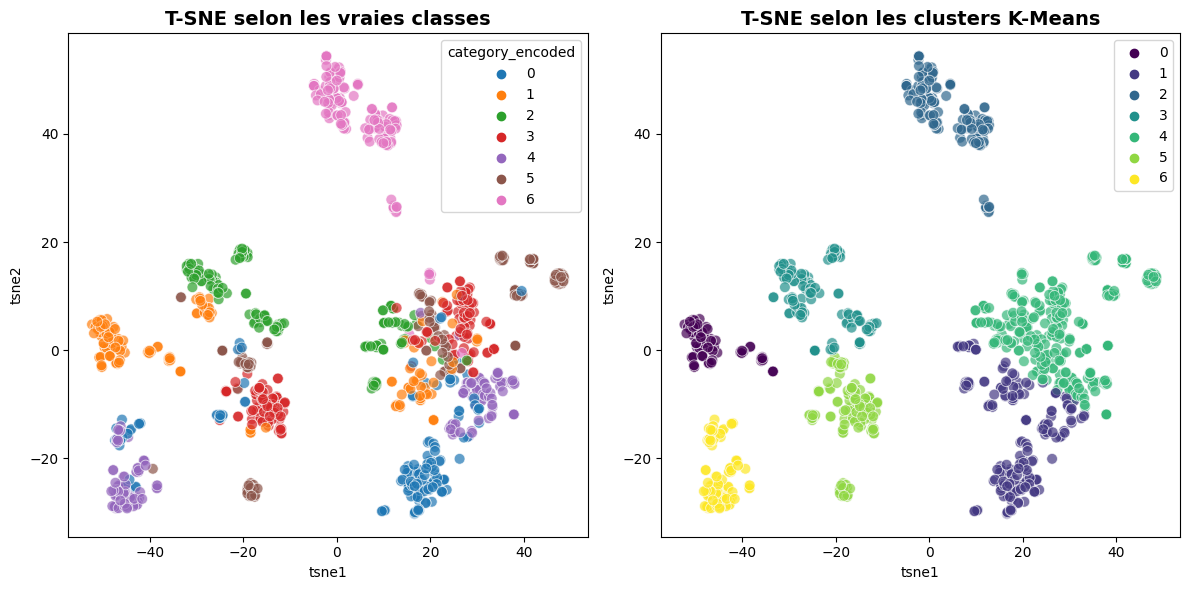


Matrice de confusion après mappage des clusters :
[[106   0   3  11  20  10   0]
 [ 32  81  18   5   0  14   0]
 [ 27   0  94   0   0  29   0]
 [  1   0   0  76   0  73   0]
 [ 27   0   0   0  74  49   0]
 [  0   0  13  36   1 100   0]
 [  0   0   0   0   0   6 144]]


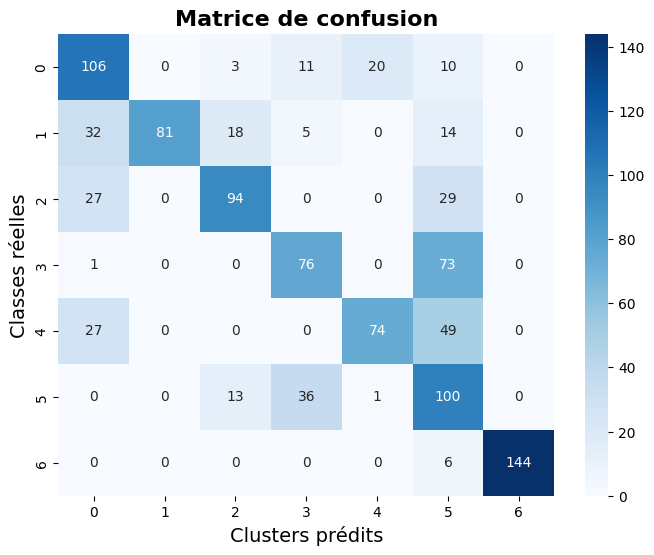


Rapport de classification :
              precision    recall  f1-score   support

           0       0.55      0.71      0.62       150
           1       1.00      0.54      0.70       150
           2       0.73      0.63      0.68       150
           3       0.59      0.51      0.55       150
           4       0.78      0.49      0.60       150
           5       0.36      0.67      0.46       150
           6       1.00      0.96      0.98       150

    accuracy                           0.64      1050
   macro avg       0.72      0.64      0.66      1050
weighted avg       0.72      0.64      0.66      1050



In [169]:
import itertools
# Préparer les données de base
ecom['cleaned_description'] = ecom['cleaned_description'].fillna("").astype(str)
tokenized_descriptions = [desc.split() for desc in ecom['cleaned_description']]
true_labels = ecom['category_encoded']

# Hyperparamètres à optimiser
word2vec_params = {
    'vector_size': [50, 100, 200],
    'window': [3, 5, 7],
    'epochs': [5, 10, 20]
}

tsne_params = {
    'learning_rate': [10, 50, 200]
}

# Variables pour stocker les meilleurs résultats
best_ari = -1
best_params = None

# Fonction pour mapper les clusters aux classes
def map_clusters_to_classes(true_labels, predicted_clusters):
    # Créer la matrice de confusion initiale
    conf_mat = confusion_matrix(true_labels, predicted_clusters)
    # Optimisation avec l'algorithme hongrois pour maximiser l'alignement
    row_ind, col_ind = linear_sum_assignment(-conf_mat)
    mapping = {cluster: cls for cluster, cls in zip(col_ind, row_ind)}
    return mapping

# Boucle pour optimiser les hyperparamètres
for wv_param in itertools.product(word2vec_params['vector_size'], word2vec_params['window'], word2vec_params['epochs']):
    vector_size, window, epochs = wv_param

    # Entraîner Word2Vec
    word2vec_model = Word2Vec(sentences=tokenized_descriptions, vector_size=vector_size, window=window, min_count=1, sg=1, epochs=epochs)

    # Calculer les vecteurs Word2Vec
    word2vec_vectors = [
        np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(vector_size)], axis=0)
        for words in tokenized_descriptions
    ]

    word2vec_vectors = np.array(word2vec_vectors)

    for tsne_lr in tsne_params['learning_rate']:
        # Réduction de dimension avec T-SNE
        tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate=tsne_lr)
        X_tsne = tsne.fit_transform(word2vec_vectors)

        # Clustering avec K-Means (fixé à 7 clusters)
        kmeans = KMeans(n_clusters=7, random_state=42)
        clusters = kmeans.fit_predict(X_tsne)

        # Mapper les clusters aux classes réelles
        cluster_mapping = map_clusters_to_classes(true_labels, clusters)
        mapped_clusters = [cluster_mapping[cluster] for cluster in clusters]

        # Calculer l'ARI
        ari = adjusted_rand_score(true_labels, mapped_clusters)
        print(f"Params: vector_size={vector_size}, window={window}, epochs={epochs}, tsne_lr={tsne_lr} -> ARI={ari}")

        # Mise à jour des meilleurs paramètres
        if ari > best_ari:
            best_ari = ari
            best_params = {
                'vector_size': vector_size,
                'window': window,
                'epochs': epochs,
                'tsne_lr': tsne_lr
            }
            # Sauvegarder les meilleurs résultats pour affichage
            best_X_tsne = X_tsne
            best_clusters = clusters
            best_mapped_clusters = mapped_clusters

# Résultats optimaux
print(f"\nMeilleur ARI : {best_ari}")
print(f"Meilleurs paramètres : {best_params}")

# Visualisation des résultats avec les meilleurs paramètres
plt.figure(figsize=(12, 6))

# T-SNE selon les vraies classes
plt.subplot(1, 2, 1)
sns.scatterplot(x=best_X_tsne[:, 0], y=best_X_tsne[:, 1], hue=true_labels, palette="tab10", s=60, alpha=0.7)
plt.title("T-SNE selon les vraies classes", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

# T-SNE selon les clusters prédits
plt.subplot(1, 2, 2)
sns.scatterplot(x=best_X_tsne[:, 0], y=best_X_tsne[:, 1], hue=best_clusters, palette="viridis", s=60, alpha=0.7)
plt.title("T-SNE selon les clusters K-Means", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

plt.tight_layout()
plt.show()

# Matrice de confusion pour les meilleurs résultats
conf_mat_mapped = confusion_matrix(true_labels, best_mapped_clusters)
print("\nMatrice de confusion après mappage des clusters :")
print(conf_mat_mapped)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_mapped, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion", fontsize=16, fontweight="bold")
plt.xlabel("Clusters prédits", fontsize=14)
plt.ylabel("Classes réelles", fontsize=14)
plt.show()

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(true_labels, best_mapped_clusters))

In [170]:
# Analyse globale des poids des tokens avec Word2Vec
print("Analyse globale des tokens avec Word2Vec...")

# Calculer la norme (magnitude) des vecteurs pour tous les tokens dans Word2Vec
token_magnitudes = {token: np.linalg.norm(word2vec_model.wv[token]) for token in word2vec_model.wv.index_to_key}

# Créer un DataFrame pour les poids des tokens
global_token_importance = pd.DataFrame({
    'Token': list(token_magnitudes.keys()),
    'Weight': list(token_magnitudes.values())
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus importants globalement
print(global_token_importance.head(10))

# Analyse locale pour un produit spécifique
index = 1  # Index du produit spécifique
print(f"Analyse locale des tokens pour le produit à l'index {index}...")

# Extraire les tokens et leurs vecteurs pour le produit spécifique
tokens = tokenized_descriptions[index]
token_vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]

# Calculer la norme pour chaque token de ce produit
local_token_magnitudes = {
    token: np.linalg.norm(word2vec_model.wv[token]) for token in tokens if token in word2vec_model.wv
}

# Créer un DataFrame pour les tokens et leurs magnitudes locales
local_token_importance = pd.DataFrame({
    'Token': list(local_token_magnitudes.keys()),
    'Weight': list(local_token_magnitudes.values())
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus importants localement
print(local_token_importance.head(10))

Analyse globale des tokens avec Word2Vec...
             Token    Weight
67            mugs  6.764746
81         adapter  6.226708
74          coffee  6.216899
200      permanent  6.142751
15             mug  6.070749
210          stays  6.065116
72         battery  6.017094
203  toodishwasher  5.976532
207       crafting  5.959797
205      porcelain  5.934807
Analyse locale des tokens pour le produit à l'index 1...
       Token    Weight
28      size  5.405563
38   package  5.398011
32      inch  5.362683
36  contents  5.278335
20      name  5.250041
11       yes  5.220270
19     model  5.219134
37     sales  5.208081
4      towel  5.126227
12  material  5.076453


# <a name="C4"><span style="text-decoration: underline;">Partie 5 : Approches méthode avancée Bert</span></a>

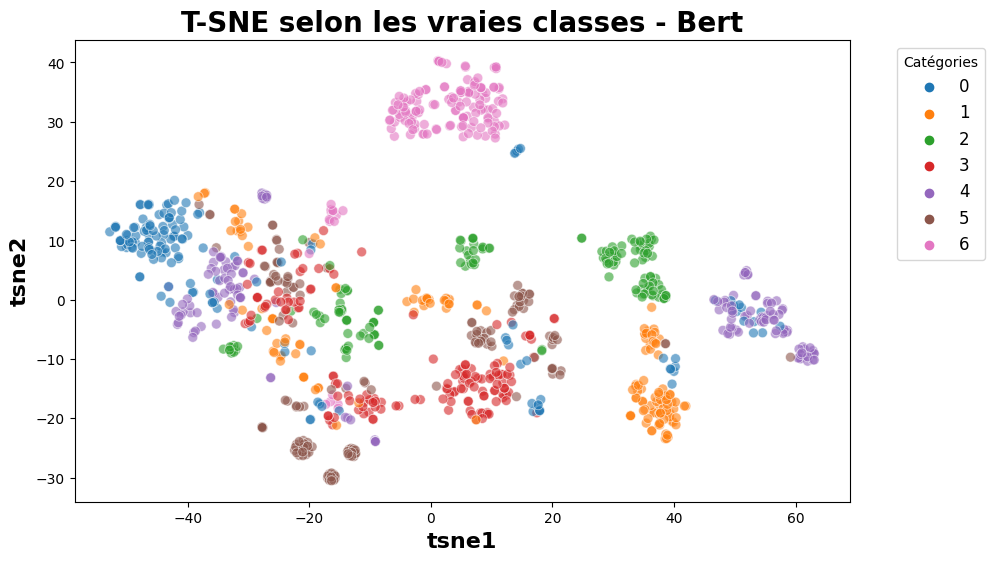

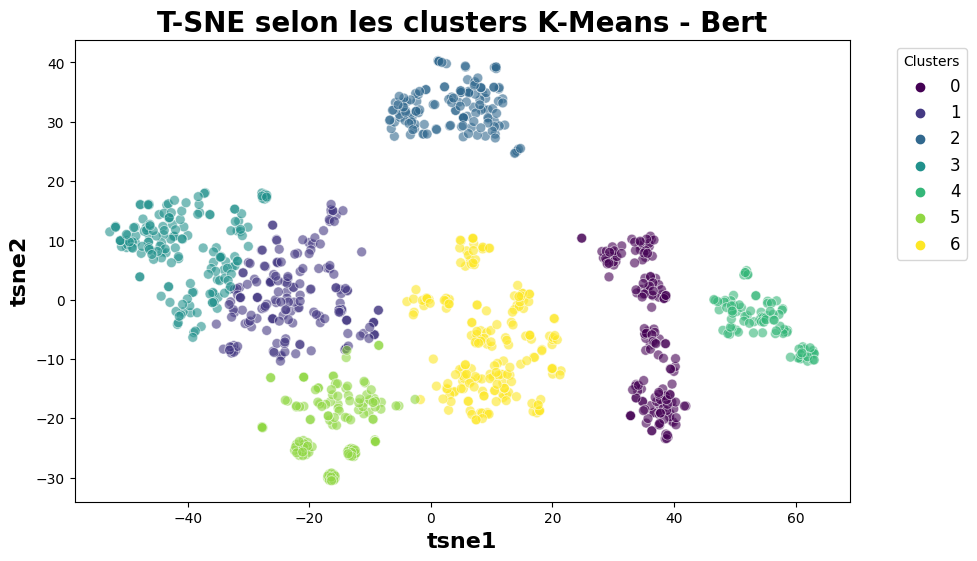

Adjusted Rand Index (ARI) après T-SNE - Bert : 0.3225559643922298



In [172]:
# Appliquer la pipeline pour Word2Vec
pipeline_common(df_bert, "Bert")

Params: max_length=128, batch_size=8, tsne_lr=10 -> ARI=0.350409553832781
Params: max_length=128, batch_size=8, tsne_lr=50 -> ARI=0.3457032216573249
Params: max_length=128, batch_size=8, tsne_lr=200 -> ARI=0.35094368964265477
Params: max_length=128, batch_size=16, tsne_lr=10 -> ARI=0.350409553832781
Params: max_length=128, batch_size=16, tsne_lr=50 -> ARI=0.3457032216573249
Params: max_length=128, batch_size=16, tsne_lr=200 -> ARI=0.35094368964265477
Params: max_length=128, batch_size=32, tsne_lr=10 -> ARI=0.350409553832781
Params: max_length=128, batch_size=32, tsne_lr=50 -> ARI=0.3457032216573249
Params: max_length=128, batch_size=32, tsne_lr=200 -> ARI=0.35094368964265477
Params: max_length=256, batch_size=8, tsne_lr=10 -> ARI=0.289716326274344
Params: max_length=256, batch_size=8, tsne_lr=50 -> ARI=0.3282170252971417
Params: max_length=256, batch_size=8, tsne_lr=200 -> ARI=0.3259365818660872
Params: max_length=256, batch_size=16, tsne_lr=10 -> ARI=0.289716326274344
Params: max_leng

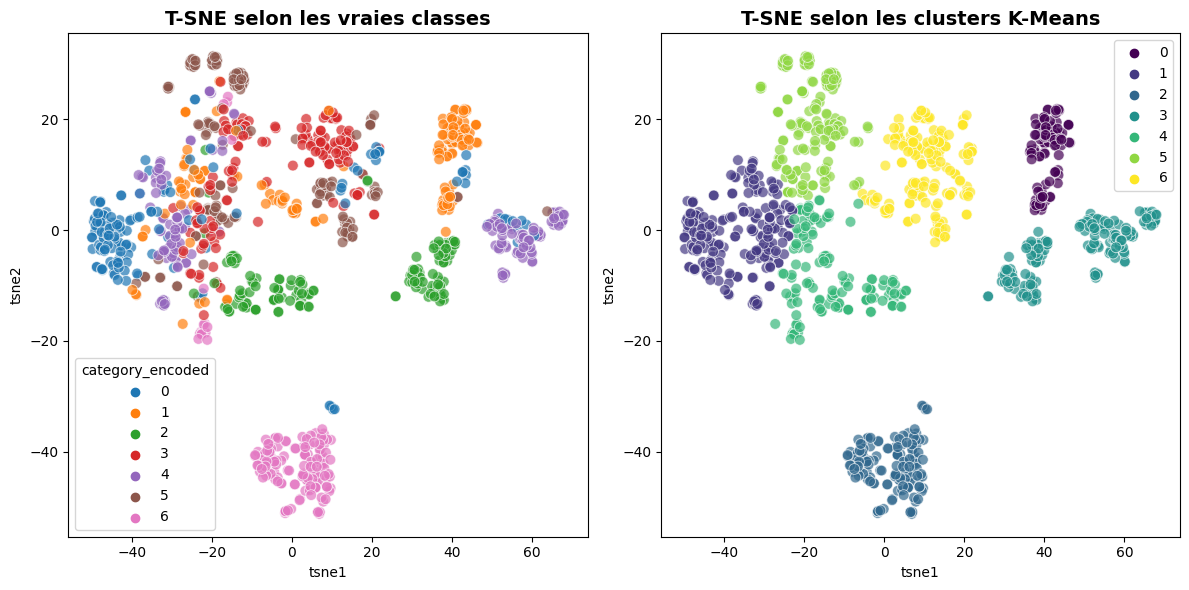


Matrice de confusion après mappage des clusters :
[[ 99   7   5  14  13   7   5]
 [ 17  79   6  23   1  24   0]
 [  0   0  76   2  70   2   0]
 [ 11   0  22  79   0  38   0]
 [ 64   0   1   0  74  11   0]
 [ 10   2  20  50   1  67   0]
 [  0   0  12   0   0   4 134]]


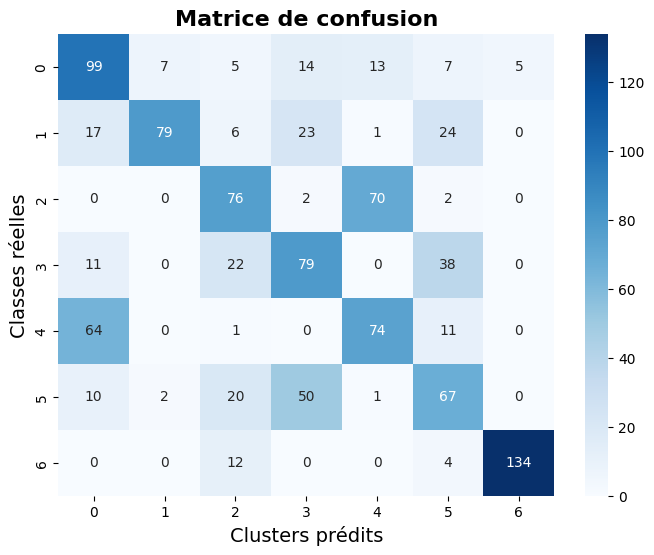


Rapport de classification :
              precision    recall  f1-score   support

           0       0.49      0.66      0.56       150
           1       0.90      0.53      0.66       150
           2       0.54      0.51      0.52       150
           3       0.47      0.53      0.50       150
           4       0.47      0.49      0.48       150
           5       0.44      0.45      0.44       150
           6       0.96      0.89      0.93       150

    accuracy                           0.58      1050
   macro avg       0.61      0.58      0.58      1050
weighted avg       0.61      0.58      0.58      1050



In [173]:
# Conversion de 'cleaned_description' en chaîne de caractères
ecom['cleaned_description'] = ecom['cleaned_description'].fillna("").astype(str)
descriptions = ecom['cleaned_description'].tolist()
true_labels = ecom['category_encoded']

# Hyperparamètres à optimiser pour BERT
bert_params = {
    'batch_size': [8, 16, 32], 
    'max_length': [128, 256]  # Différentes tailles de longueur maximale des séquences
}

tsne_params = {
    'learning_rate': [10, 50, 200]
}

# Variables pour stocker les meilleurs résultats
best_ari = -1
best_params = None
best_X_tsne = None
best_clusters = None
best_mapped_clusters = None

# Fonction pour mapper les clusters aux classes
def map_clusters_to_classes(true_labels, predicted_clusters):
    # Créer la matrice de confusion initiale
    conf_mat = confusion_matrix(true_labels, predicted_clusters)
    # Optimisation avec l'algorithme hongrois pour maximiser l'alignement
    row_ind, col_ind = linear_sum_assignment(-conf_mat)
    mapping = {cluster: cls for cluster, cls in zip(col_ind, row_ind)}
    return mapping

# Charger le modèle BERT et le tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Fonction pour obtenir les embeddings BERT pour chaque description
def get_bert_embeddings(descriptions, max_length=256):
    bert_vectors = []
    for desc in descriptions:
        inputs = tokenizer(desc, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        outputs = bert_model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        bert_vectors.append(embeddings[0])
    return np.array(bert_vectors)

# Boucle pour optimiser les hyperparamètres
for max_length, batch_size in itertools.product(bert_params['max_length'], bert_params['batch_size']):
    
    # Calcul des vecteurs BERT pour chaque description
    bert_vectors = get_bert_embeddings(descriptions, max_length=max_length)
    
    for tsne_lr in tsne_params['learning_rate']:
        # Normalisation des données
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(bert_vectors)

        # Réduction de dimension avec PCA
        pca = PCA(n_components=50, random_state=42)
        features_pca = pca.fit_transform(features_scaled)

        # Réduction de dimension avec T-SNE
        tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate=tsne_lr)
        X_tsne = tsne.fit_transform(features_pca)

        # Clustering avec K-Means (fixé à 7 clusters)
        kmeans = KMeans(n_clusters=7, random_state=42)
        clusters = kmeans.fit_predict(X_tsne)

        # Mapper les clusters aux classes réelles
        cluster_mapping = map_clusters_to_classes(true_labels, clusters)
        mapped_clusters = [cluster_mapping[cluster] for cluster in clusters]

        # Calculer l'ARI
        ari = adjusted_rand_score(true_labels, mapped_clusters)
        print(f"Params: max_length={max_length}, batch_size={batch_size}, tsne_lr={tsne_lr} -> ARI={ari}")

        # Mise à jour des meilleurs paramètres
        if ari > best_ari:
            best_ari = ari
            best_params = {
                'max_length': max_length,
                'batch_size': batch_size,
                'tsne_lr': tsne_lr
            }
            # Sauvegarder les meilleurs résultats pour affichage
            best_X_tsne = X_tsne
            best_clusters = clusters
            best_mapped_clusters = mapped_clusters

# Résultats optimaux
print(f"\nMeilleur ARI : {best_ari}")
print(f"Meilleurs paramètres : {best_params}")

# Visualisation des résultats avec les meilleurs paramètres
plt.figure(figsize=(12, 6))

# T-SNE selon les vraies classes
plt.subplot(1, 2, 1)
sns.scatterplot(x=best_X_tsne[:, 0], y=best_X_tsne[:, 1], hue=true_labels, palette="tab10", s=60, alpha=0.7)
plt.title("T-SNE selon les vraies classes", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

# T-SNE selon les clusters prédits
plt.subplot(1, 2, 2)
sns.scatterplot(x=best_X_tsne[:, 0], y=best_X_tsne[:, 1], hue=best_clusters, palette="viridis", s=60, alpha=0.7)
plt.title("T-SNE selon les clusters K-Means", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

plt.tight_layout()
plt.show()

# Matrice de confusion pour les meilleurs résultats
conf_mat_mapped = confusion_matrix(true_labels, best_mapped_clusters)
print("\nMatrice de confusion après mappage des clusters :")
print(conf_mat_mapped)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_mapped, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion", fontsize=16, fontweight="bold")
plt.xlabel("Clusters prédits", fontsize=14)
plt.ylabel("Classes réelles", fontsize=14)
plt.show()

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(true_labels, best_mapped_clusters))

In [174]:
# Vérifiez que les descriptions sont nettoyées correctement
ecom['cleaned_description'] = ecom['cleaned_description'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()

# Analyse globale des tokens avec BERT
print("Analyse globale des tokens avec BERT...")

# Charger le tokenizer et le modèle BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")

# Créer une structure pour collecter les embeddings des tokens
token_embeddings_global = {}

# Calculer les embeddings pour tous les tokens uniques
for desc in ecom['cleaned_description']:
    # Encodage des descriptions avec vérification
    inputs = tokenizer(
        desc, 
        return_tensors='pt', 
        padding=True, 
        truncation=True, 
        max_length=128
    )
    
    # Vérification des input_ids pour éviter les indices hors plage
    if torch.max(inputs['input_ids']) >= tokenizer.vocab_size:
        print(f"Erreur : indices hors plage détectés pour la description : {desc}")
        continue
    
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # Extraire les embeddings pour tous les tokens
    token_ids = inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(token_ids)
    token_embeddings = outputs.last_hidden_state[0]  # Shape : (sequence_length, hidden_size)

    # Calculer la norme (magnitude) pour chaque token
    for token, embedding in zip(tokens, token_embeddings):
        if token in ['[CLS]', '[SEP]', '[PAD]'] or token.startswith('##'):  # Filtrer tokens spéciaux
            continue
        norm = torch.linalg.norm(embedding).item()
        if token in token_embeddings_global:
            token_embeddings_global[token].append(norm)
        else:
            token_embeddings_global[token] = [norm]

# Calculer la moyenne globale des magnitudes pour chaque token
global_token_magnitudes = {
    token: np.mean(magnitudes) 
    for token, magnitudes in token_embeddings_global.items()
}

# Créer un DataFrame pour les poids des tokens globaux
global_token_importance = pd.DataFrame({
    'Token': list(global_token_magnitudes.keys()),
    'Weight': list(global_token_magnitudes.values())
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus importants globalement
print(global_token_importance.head(10))

# Analyse locale des tokens pour un produit spécifique
index = 1  # Index du produit spécifique
print(f"Analyse locale des tokens pour le produit à l'index {index}...")

# Extraire les tokens et leurs embeddings pour le produit spécifique
sample_desc = ecom['cleaned_description'].iloc[index]
inputs = tokenizer(
    sample_desc, 
    return_tensors='pt', 
    padding=True, 
    truncation=True, 
    max_length=128
)

# Vérification des input_ids pour éviter les indices hors plage
if torch.max(inputs['input_ids']) >= tokenizer.vocab_size:
    print(f"Erreur : indices hors plage détectés pour la description : {sample_desc}")
else:
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # Extraire les tokens et leurs embeddings
    token_ids = inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(token_ids)
    token_embeddings = outputs.last_hidden_state[0]  # Shape : (sequence_length, hidden_size)

    # Calculer la norme pour chaque token du produit spécifique
    local_token_magnitudes = {
        token: torch.linalg.norm(embedding).item()
        for token, embedding in zip(tokens, token_embeddings)
        if token not in ['[CLS]', '[SEP]', '[PAD]'] and not token.startswith('##')
    }

    # Créer un DataFrame pour les tokens et leurs magnitudes locales
    local_token_importance = pd.DataFrame({
        'Token': list(local_token_magnitudes.keys()),
        'Weight': list(local_token_magnitudes.values())
    }).sort_values(by='Weight', ascending=False)

    # Afficher les 10 tokens les plus importants localement
    print(local_token_importance.head(10))


Analyse globale des tokens avec BERT...
        Token     Weight
3027      ios  17.483130
2312      dat  17.465680
3080     ipad  17.421662
286        mt  17.393589
1014    learn  17.366903
1407     what  17.361667
1922      pam  17.357218
3066       hd  17.353034
1262  windows  17.346765
1323     your  17.343387
Analyse locale des tokens pour le produit à l'index 1...
     Token     Weight
3     bath  16.948193
1      sat  16.541298
2   cotton  14.966027
18      gs  14.740232
4    towel  14.678622
6   yellow  14.507939
5      red  13.946511
10    wash  13.904998
33   width  13.878005
7     blue  13.733888


# <a name="C4"><span style="text-decoration: underline;">Partie 6 : Approches méthode innovante DeBERTa</span></a>

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Époque 1/3 - Perte moyenne: 0.10916422570035571 - Temps écoulé: 1236.40 secondes
Époque 2/3 - Perte moyenne: 0.039064259880355424 - Temps écoulé: 1307.65 secondes
Époque 3/3 - Perte moyenne: 0.014653723762326298 - Temps écoulé: 1115.58 secondes
ARI obtenu : 0.858
Visualisation des embeddings avec T-SNE pour le modèle DeBERTa...


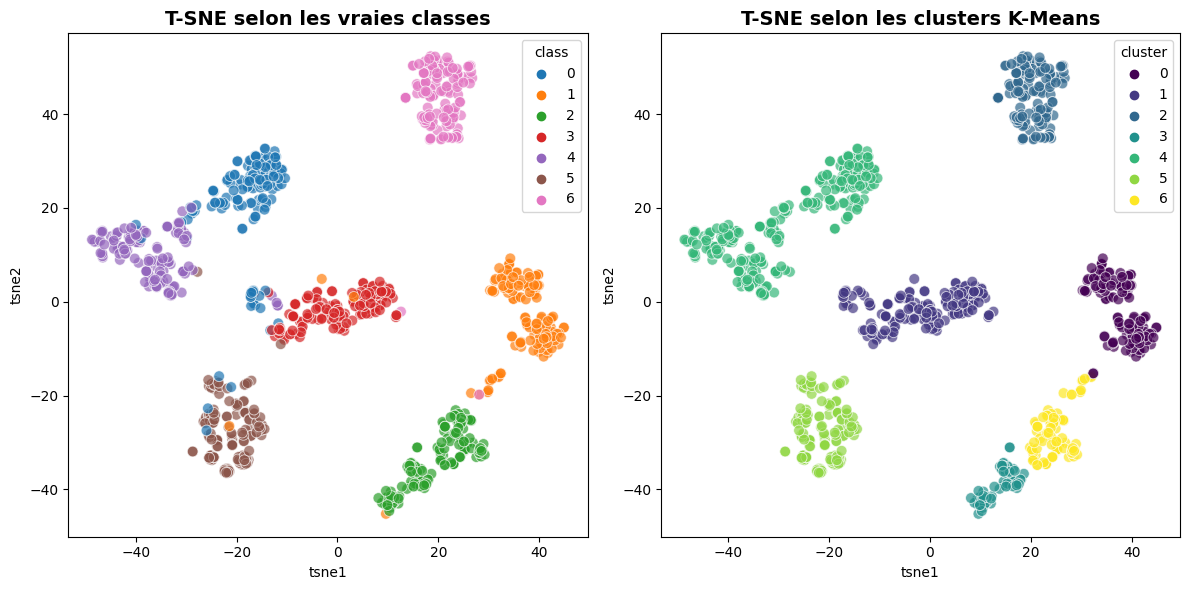

In [176]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# 1. Préparer les données
ecom['input_text'] = ecom['cleaned_description'].apply(lambda x: f"classify: {x}")

# Charger le modèle DeBERTa et le tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-base", num_labels=7)

# Tokenisation des descriptions
inputs = tokenizer(list(ecom['input_text']), padding=True, truncation=True, max_length=128, return_tensors="pt")
labels = torch.tensor(ecom['category_encoded'].values)

# Création des datasets d'entraînement et de validation
data = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_size = int(0.8 * len(data))
eval_size = len(data) - train_size
train_dataset, eval_dataset = random_split(data, [train_size, eval_size])

# Définir l'optimiseur et charger le modèle sur le GPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# 2. Entraînement du modèle DeBERTa
num_epochs = 3  # Nombre d'époques d'entraînement

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    start_time = time.time()
    for batch in DataLoader(train_dataset, batch_size=16, shuffle=True):
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    end_time = time.time()
    print(f"Époque {epoch+1}/{num_epochs} - Perte moyenne: {total_loss / len(train_dataset)} - Temps écoulé: {end_time - start_time:.2f} secondes")

# 3. Évaluation du modèle DeBERTa
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in DataLoader(eval_dataset, batch_size=16):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calcul de l'ARI
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"ARI obtenu : {ari_score:.3f}")

# 4. Visualisation T-SNE pour le modèle DeBERTa
print("Visualisation des embeddings avec T-SNE pour le modèle DeBERTa...")

# Extraire les embeddings avec DeBERTa
embeddings = []
with torch.no_grad():
    for desc in ecom['cleaned_description']:
        inputs = tokenizer(desc, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
        outputs = model.base_model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy())

# Convertir les embeddings en tableau numpy
embeddings_np = np.array(embeddings)

# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate=200)
X_tsne = tsne.fit_transform(embeddings_np)

# Clustering K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Création d'un DataFrame pour visualiser
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['class'] = ecom['category_encoded']
df_tsne['cluster'] = clusters

# Visualisation des vraies classes et des clusters
plt.figure(figsize=(12, 6))

# Vraies classes
plt.subplot(1, 2, 1)
sns.scatterplot(x='tsne1', y='tsne2', hue='class', palette="tab10", data=df_tsne, s=60, alpha=0.7)
plt.title("T-SNE selon les vraies classes", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

# Clusters K-Means
plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', palette="viridis", data=df_tsne, s=60, alpha=0.7)
plt.title("T-SNE selon les clusters K-Means", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

plt.tight_layout()
plt.show()

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test avec learning_rate=2e-05, epochs=3, batch_size=16
Époque 1/3 - Perte moyenne: 0.11578946709632873 - Temps écoulé: 1034.71 secondes
Époque 2/3 - Perte moyenne: 0.03616074005230552 - Temps écoulé: 955.75 secondes
Époque 3/3 - Perte moyenne: 0.01144006209270585 - Temps écoulé: 893.82 secondes
ARI obtenu : 0.876 pour learning_rate=2e-05, epochs=3, batch_size=16
Test avec learning_rate=2e-05, epochs=5, batch_size=16
Époque 1/5 - Perte moyenne: 0.006706865476666107 - Temps écoulé: 894.10 secondes
Époque 2/5 - Perte moyenne: 0.004211015020874107 - Temps écoulé: 931.00 secondes
Époque 3/5 - Perte moyenne: 0.004378607825353919 - Temps écoulé: 980.92 secondes
Époque 4/5 - Perte moyenne: 0.0029098067892759684 - Temps écoulé: 1110.45 secondes
Époque 5/5 - Perte moyenne: 0.0018826319748075635 - Temps écoulé: 1076.71 secondes
ARI obtenu : 0.876 pour learning_rate=2e-05, epochs=5, batch_size=16
Test avec learning_rate=3e-05, epochs=3, batch_size=16
Époque 1/3 - Perte moyenne: 0.00345462210811785

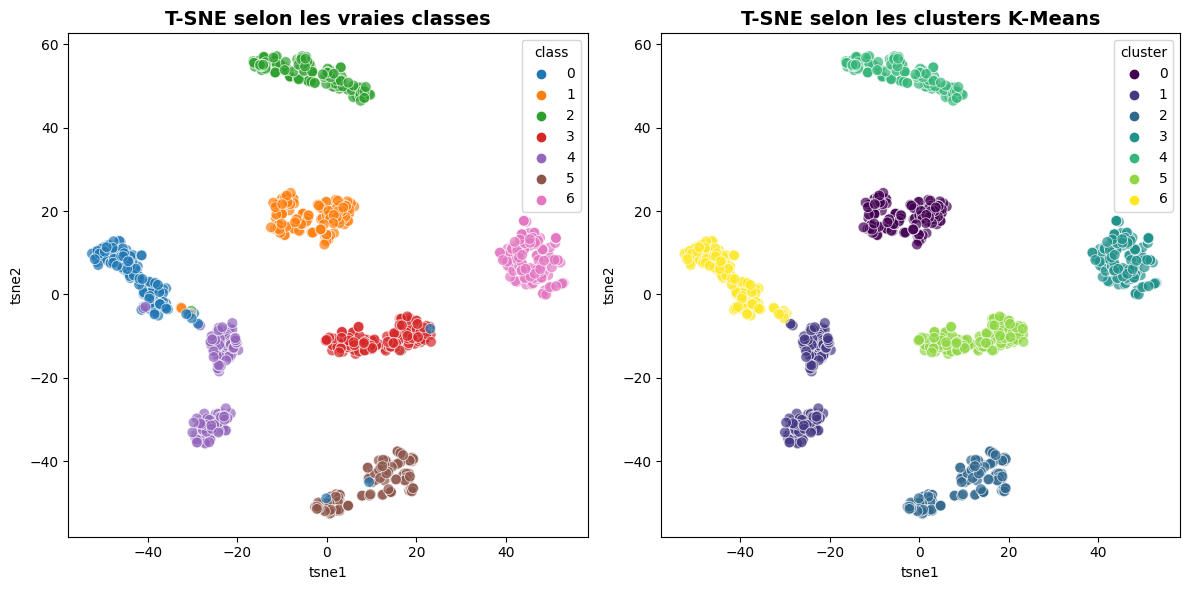

In [177]:
# Préparer les données
ecom['input_text'] = ecom['cleaned_description'].apply(lambda x: f"classify: {x}")

# Charger le modèle DeBERTa et le tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-base", num_labels=7)

# Tokenisation des descriptions
inputs = tokenizer(list(ecom['input_text']), padding=True, truncation=True, max_length=128, return_tensors="pt")
labels = torch.tensor(ecom['category_encoded'].values)

# Création des datasets d'entraînement et de validation
data = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_size = int(0.8 * len(data))
eval_size = len(data) - train_size
train_dataset, eval_dataset = random_split(data, [train_size, eval_size])

# Définir l'optimiseur et charger le modèle sur le GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Affiner GridSearch
param_grid = {
    'learning_rate': [ 2e-5, 3e-5],
    'num_epochs': [3, 5],
    'batch_size': [16]
}

# Variables pour stocker les meilleurs résultats
best_ari = -1
best_params = None
best_model = None

# Fonction pour entraîner et évaluer le modèle
def train_and_evaluate(learning_rate, num_epochs, batch_size):
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    
    # Entraînement du modèle
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        start_time = time.time()
        for batch in DataLoader(train_dataset, batch_size=batch_size, shuffle=True):
            optimizer.zero_grad()
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip des gradients
            optimizer.step()
            total_loss += loss.item()
        
        end_time = time.time()
        print(f"Époque {epoch+1}/{num_epochs} - Perte moyenne: {total_loss / len(train_dataset)} - Temps écoulé: {end_time - start_time:.2f} secondes")
    
    # Évaluation du modèle
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in DataLoader(eval_dataset, batch_size=batch_size):
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            y_pred.extend(predictions.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    # Calcul de l'ARI
    ari_score = adjusted_rand_score(y_true, y_pred)
    print(f"ARI obtenu : {ari_score:.3f} pour learning_rate={learning_rate}, epochs={num_epochs}, batch_size={batch_size}")
    
    return ari_score

# GridSearch pour optimiser l'ARI
for params in ParameterGrid(param_grid):
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs']
    batch_size = params['batch_size']
    
    print(f"Test avec learning_rate={learning_rate}, epochs={num_epochs}, batch_size={batch_size}")
    
    # Entraîner et évaluer le modèle avec les paramètres actuels
    ari_score = train_and_evaluate(learning_rate, num_epochs, batch_size)
    
    # Mettre à jour le meilleur ARI et les meilleurs hyperparamètres
    if ari_score > best_ari:
        best_ari = ari_score
        best_params = (learning_rate, num_epochs, batch_size)
        best_model = model  # Sauvegarder le meilleur modèle

print(f"Meilleur ARI : {best_ari:.3f} obtenu avec learning_rate={best_params[0]}, epochs={best_params[1]}, batch_size={best_params[2]}")

# Visualisation T-SNE pour le meilleur modèle
print("Visualisation des embeddings avec T-SNE pour le meilleur modèle...")

# Extraire les embeddings avec le meilleur modèle
best_model.eval()
embeddings = []
with torch.no_grad():
    for desc in ecom['cleaned_description']:
        inputs = tokenizer(desc, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
        outputs = best_model.base_model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy())

# Normalisation des embeddings
embeddings_np = np.array(embeddings)
embeddings_normalized = StandardScaler().fit_transform(embeddings_np)

# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate=200)
X_tsne = tsne.fit_transform(embeddings_normalized)

# Clustering K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Création d'un DataFrame pour visualiser
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['class'] = ecom['category_encoded']
df_tsne['cluster'] = clusters

# Visualisation des vraies classes et des clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Vraies classes
plt.subplot(1, 2, 1)
sns.scatterplot(x='tsne1', y='tsne2', hue='class', palette="tab10", data=df_tsne, s=60, alpha=0.7)
plt.title("T-SNE selon les vraies classes", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

# Clusters K-Means
plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', palette="viridis", data=df_tsne, s=60, alpha=0.7)
plt.title("T-SNE selon les clusters K-Means", fontsize=14, fontweight='bold')
plt.xlabel("tsne1")
plt.ylabel("tsne2")

plt.tight_layout()
plt.show()

Matrice de confusion :
[[145   0   0   1   2   2   0]
 [  3 147   0   0   0   0   0]
 [  1   0 149   0   0   0   0]
 [  0   0   0 150   0   0   0]
 [  2   0   0   0 148   0   0]
 [  0   0   0   1   0 149   0]
 [  0   0   0   0   0   0 150]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       150
           1       1.00      0.98      0.99       150
           2       1.00      0.99      1.00       150
           3       0.99      1.00      0.99       150
           4       0.99      0.99      0.99       150
           5       0.99      0.99      0.99       150
           6       1.00      1.00      1.00       150

    accuracy                           0.99      1050
   macro avg       0.99      0.99      0.99      1050
weighted avg       0.99      0.99      0.99      1050



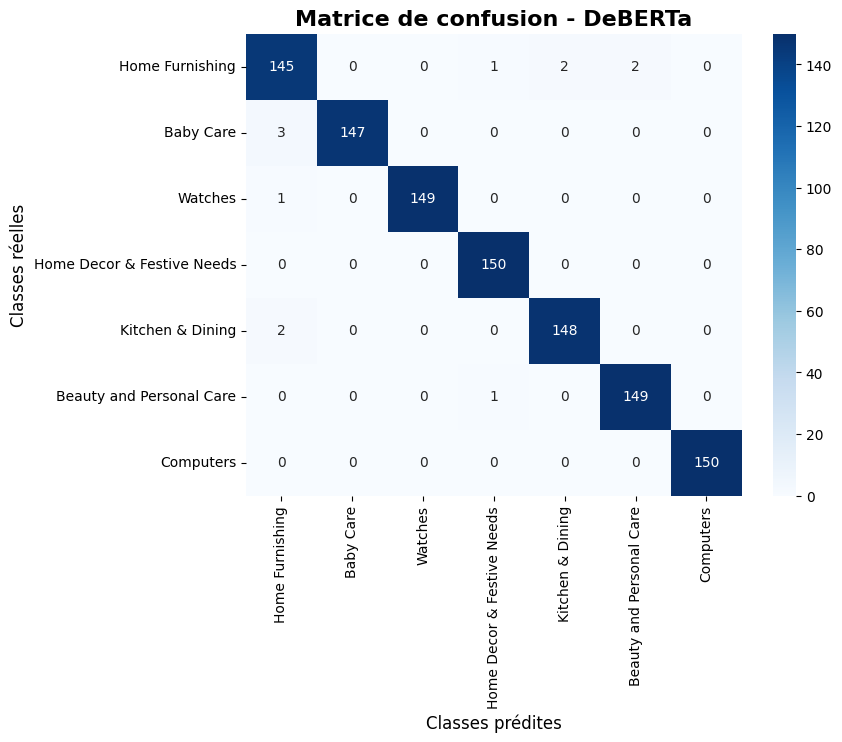

In [178]:
from scipy.optimize import linear_sum_assignment

# Fonction pour mapper les clusters aux classes réelles
def map_clusters_to_classes(true_labels, predicted_clusters):
    conf_mat = confusion_matrix(true_labels, predicted_clusters)
    row_ind, col_ind = linear_sum_assignment(-conf_mat)
    mapping = {cluster: cls for cluster, cls in zip(col_ind, row_ind)}
    return mapping

# Mapper les clusters aux classes réelles
cluster_mapping = map_clusters_to_classes(ecom['category_encoded'], clusters)
mapped_clusters = [cluster_mapping[cluster] for cluster in clusters]

# Calcul de la matrice de confusion
conf_mat = confusion_matrix(ecom['category_encoded'], mapped_clusters)
print("Matrice de confusion :")
print(conf_mat)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(ecom['category_encoded'], mapped_clusters))

# Liste des étiquettes (à ajuster si nécessaire)
list_labels = ['Home Furnishing', 'Baby Care', 'Watches', 
               'Home Decor & Festive Needs', 'Kitchen & Dining', 
               'Beauty and Personal Care', 'Computers']

# Créer un DataFrame pour la heatmap
df_cm = pd.DataFrame(conf_mat, index=list_labels[:conf_mat.shape[0]],
                     columns=list_labels[:conf_mat.shape[1]])

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title("Matrice de confusion - DeBERTa", fontsize=16, fontweight="bold")
plt.xlabel("Classes prédites", fontsize=12)
plt.ylabel("Classes réelles", fontsize=12)
plt.show()

In [267]:
# Analyse Globale des Tokens avec DeBERTa
print("Analyse globale des tokens avec DeBERTa...")

# Extraire les embeddings des tokens pour un échantillon de descriptions
embeddings = []
token_weights = {}
num_samples = 100  # Limite à 100 descriptions pour accélérer

for desc in ecom['cleaned_description'][:num_samples]:
    inputs = tokenizer(desc, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = best_model.base_model(**inputs)
    token_embeddings = outputs.last_hidden_state.squeeze(0).cpu().numpy()  # Shape: (seq_len, hidden_dim)

    # Calcul de l'importance des tokens : Moyenne des embeddings absolus pour chaque token
    token_means = np.mean(np.abs(token_embeddings), axis=1)
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0).cpu().numpy())

    # Agréger les poids des tokens globalement
    for token, weight in zip(tokens, token_means):
        if token in token_weights:
            token_weights[token].append(weight)
        else:
            token_weights[token] = [weight]

# Moyenne globale des poids des tokens
global_token_importance = {token: np.mean(weights) for token, weights in token_weights.items()}

# Convertir en DataFrame et trier
global_token_importance_df = pd.DataFrame.from_dict(global_token_importance, orient='index', columns=['Weight'])
global_token_importance_df = global_token_importance_df.sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus importants globalement
print(global_token_importance_df.head(10))


# Analyse Locale pour un Produit Spécifique
print("Analyse locale des tokens pour un produit spécifique...")

# Choisir un produit spécifique
index = 1
sample_input = ecom['cleaned_description'][index]
inputs = tokenizer(sample_input, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)

# Extraire les embeddings pour l'exemple
with torch.no_grad():
    outputs = best_model.base_model(**inputs)
token_embeddings = outputs.last_hidden_state.squeeze(0).cpu().numpy()  # Shape: (seq_len, hidden_dim)

# Calculer les moyennes absolues des embeddings des tokens pour l'instance spécifique
token_means = np.mean(np.abs(token_embeddings), axis=1)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0).cpu().numpy())

# Créer un DataFrame pour les tokens et leurs poids
local_token_importance_df = pd.DataFrame({
    'Token': tokens,
    'Weight': token_means
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus influents localement
print(local_token_importance_df.head(10))

Analyse globale des tokens avec DeBERTa...
             Weight
raw        0.769573
ani        0.769246
ite        0.768822
Ġapparel   0.768510
Ġdenim     0.768469
Ġprimary   0.768357
Ġoccasion  0.768200
Ġmel       0.768172
Ġpatch     0.768152
he         0.768118
Analyse locale des tokens pour un produit spécifique...
        Token    Weight
0       [CLS]  0.759298
7     Ġcotton  0.758304
22  Ġmaterial  0.754914
53        Ġas  0.754213
5          iy  0.753499
10      Ġbath  0.753410
44    Ġcotton  0.752776
3          Ġs  0.752275
1        spec  0.752019
48       Ġmen  0.751670


In [271]:
# Analyse Globale des Tokens avec DeBERTa
print("Analyse globale des tokens avec DeBERTa...")

# Extraire les embeddings des tokens pour un échantillon de descriptions
embeddings = []
token_weights = {}
num_samples = 100  # Limite à 100 descriptions pour accélérer

for desc in ecom['cleaned_description'][:num_samples]:
    inputs = tokenizer(desc, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = best_model.base_model(**inputs)
    token_embeddings = outputs.last_hidden_state.squeeze(0).cpu().numpy()  # Shape: (seq_len, hidden_dim)

    # Calcul de l'importance des tokens : Moyenne des embeddings absolus pour chaque token
    token_means = np.mean(np.abs(token_embeddings), axis=1)
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0).cpu().numpy())

    # Agréger les poids des tokens globalement (exclure les mots courts)
    for token, weight in zip(tokens, token_means):
        if len(token) > 3:  # Exclure les tokens courts de 2 caractères ou moins
            if token in token_weights:
                token_weights[token].append(weight)
            else:
                token_weights[token] = [weight]

# Moyenne globale des poids des tokens
global_token_importance = {token: np.mean(weights) for token, weights in token_weights.items()}

# Convertir en DataFrame et trier
global_token_importance_df = pd.DataFrame.from_dict(global_token_importance, orient='index', columns=['Weight'])
global_token_importance_df = global_token_importance_df.sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus importants globalement
print(global_token_importance_df.head(10))


# Analyse Locale pour un Produit Spécifique
print("Analyse locale des tokens pour un produit spécifique...")

# Choisir un produit spécifique
index = 1
sample_input = ecom['cleaned_description'][index]
inputs = tokenizer(sample_input, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)

# Extraire les embeddings pour l'exemple
with torch.no_grad():
    outputs = best_model.base_model(**inputs)
token_embeddings = outputs.last_hidden_state.squeeze(0).cpu().numpy()  # Shape: (seq_len, hidden_dim)

# Calculer les moyennes absolues des embeddings des tokens pour l'instance spécifique
token_means = np.mean(np.abs(token_embeddings), axis=1)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0).cpu().numpy())

# Créer un DataFrame pour les tokens et leurs poids (exclure les mots courts)
local_token_importance_df = pd.DataFrame({
    'Token': [token for token in tokens if len(token) > 3],  # Exclure les tokens courts
    'Weight': [weight for token, weight in zip(tokens, token_means) if len(token) > 3]
}).sort_values(by='Weight', ascending=False)

# Afficher les 10 tokens les plus influents localement
print(local_token_importance_df.head(10))

Analyse globale des tokens avec DeBERTa...
             Weight
Ġapparel   0.768510
Ġdenim     0.768469
Ġprimary   0.768357
Ġoccasion  0.768200
Ġmel       0.768172
Ġpatch     0.768152
Ġpocket    0.768009
Ġbasic     0.768005
Ġshorts    0.767993
Ġpockets   0.767970
Analyse locale des tokens pour un produit spécifique...
        Token    Weight
0       [CLS]  0.759298
3     Ġcotton  0.758304
18  Ġmaterial  0.754914
6       Ġbath  0.753410
30    Ġcotton  0.752776
1        spec  0.752019
34       Ġmen  0.751670
4       Ġbath  0.751557
25      Ġtype  0.750534
33     Ġideal  0.749990


- Ġ indique qu'il s'agit d'un nouveau mot commençant après un espace.
- L'absence de Ġ signifie que le token est une continuation ou une partie d'un mot précédent.
- Le token [CLS] est inséré au début de chaque séquence par le tokenizer. il est toujours à la position 0

# <a name="C5"><span style="text-decoration: underline;">Partie 7 : Comparaison des méthodes</span></a>

In [274]:
# Remplissage métriques calculées pour chaque approche
metrics = {
    "Métriques": ["ARI", "Précision moyenne", "Rappel moyen", "F1-score moyen"],
    "TF-IDF": [
        0.34,  # ARI pour TF-IDF
        0.57,  # précision moyenne pour TF-IDF
        0.56,  # rappel moyen pour TF-IDF
        0.55,  # F1-score moyen pour TF-IDF
    ],
     "Word2vec": [
        0.38,  # ARI calculé pour Word2vec
        0.72,  # précision moyenne pour Word2vec
        0.64,  # rappel moyen pour Word2vec
        0.66,  # F1-score moyen pour Word2vec
    ],
     "Bert": [
        0.35,  # ARI calculé pour Bert
        0.61,  # précision moyenne pour Bert
        0.58,  # rappel moyen pour Bert
        0.58,  # F1-score moyen pour Bert
    ],
    "DeBERTa": [
        0.876,  # ARI calculé pour DeBERTa
        0.99,  # précision moyenne pour DeBERTa
        0.99,  # rappel moyen pour DeBERTa
        0.99,  # F1-score moyen pour DeBERTa
    ]
}

# Création du DataFrame
comparison_df = pd.DataFrame(metrics)

# Afficher le tableau
print("\nTableau de comparaison des performances :\n")
print(comparison_df)


Tableau de comparaison des performances :

           Métriques  TF-IDF  Word2vec  Bert  DeBERTa
0                ARI    0.34      0.38  0.35    0.876
1  Précision moyenne    0.57      0.72  0.61    0.990
2       Rappel moyen    0.56      0.64  0.58    0.990
3     F1-score moyen    0.55      0.66  0.58    0.990
